<a href="https://colab.research.google.com/github/jsong55/Machine_Learning/blob/master/01_neural_network_health_insurance_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


In [ ]:
# Create X & Y values
X = insurance_one_hot.drop("charges",axis = 1)
Y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Creat training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,
                                  random_state = 42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
# create a network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ["mae"])

history = insurance_model.fit(X_train,Y_train,epochs = 200,verbose = 2)

Epoch 1/200
34/34 - 1s - loss: 8232.9756 - mae: 8232.9756 - 1s/epoch - 39ms/step
Epoch 2/200
34/34 - 0s - loss: 6236.7129 - mae: 6236.7129 - 120ms/epoch - 4ms/step
Epoch 3/200
34/34 - 0s - loss: 4648.9487 - mae: 4648.9487 - 88ms/epoch - 3ms/step
Epoch 4/200
34/34 - 0s - loss: 4461.6143 - mae: 4461.6143 - 86ms/epoch - 3ms/step
Epoch 5/200
34/34 - 0s - loss: 4059.1047 - mae: 4059.1047 - 155ms/epoch - 5ms/step
Epoch 6/200
34/34 - 0s - loss: 3912.0562 - mae: 3912.0562 - 97ms/epoch - 3ms/step
Epoch 7/200
34/34 - 0s - loss: 4239.3311 - mae: 4239.3311 - 103ms/epoch - 3ms/step
Epoch 8/200
34/34 - 0s - loss: 4408.6553 - mae: 4408.6553 - 84ms/epoch - 2ms/step
Epoch 9/200
34/34 - 0s - loss: 3920.8206 - mae: 3920.8206 - 92ms/epoch - 3ms/step
Epoch 10/200
34/34 - 0s - loss: 3985.5312 - mae: 3985.5312 - 95ms/epoch - 3ms/step
Epoch 11/200
34/34 - 0s - loss: 3942.1646 - mae: 3942.1646 - 102ms/epoch - 3ms/step
Epoch 12/200
34/34 - 0s - loss: 4014.5359 - mae: 4014.5359 - 112ms/epoch - 3ms/step
Epoch 13/

In [ ]:
# check the results
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3373.1199 - mae: 3373.1199


[3373.119873046875, 3373.119873046875]

Text(0.5, 0, 'epochs')

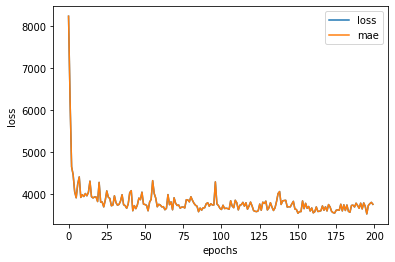

In [ ]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Data Normalization and standrization

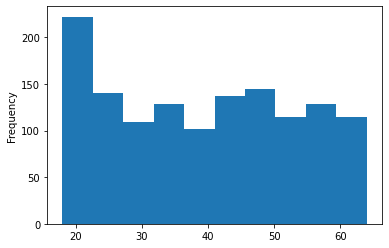

In [ ]:
X["age"].plot(kind="hist")

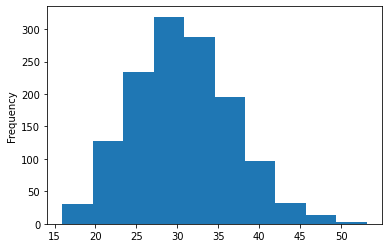

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts() 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn values to 0 - 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# create X & Y
X = insurance.drop("charges",axis=1)
Y = insurance["charges"]

# create train and test sets
X_train,X_test,Y_train,_Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# fit the column transformer to training data
ct.fit(X_train)

# transform training and test data with noramlization and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal.shape

(1070, 11)

Epoch 1/200
34/34 - 2s - loss: 7940.5830 - mae: 7940.5830 - 2s/epoch - 45ms/step
Epoch 2/200
34/34 - 0s - loss: 3938.8948 - mae: 3938.8948 - 163ms/epoch - 5ms/step
Epoch 3/200
34/34 - 0s - loss: 3701.8669 - mae: 3701.8669 - 140ms/epoch - 4ms/step
Epoch 4/200
34/34 - 0s - loss: 3787.2427 - mae: 3787.2427 - 146ms/epoch - 4ms/step
Epoch 5/200
34/34 - 0s - loss: 3657.8293 - mae: 3657.8293 - 151ms/epoch - 4ms/step
Epoch 6/200
34/34 - 0s - loss: 3882.1943 - mae: 3882.1943 - 136ms/epoch - 4ms/step
Epoch 7/200
34/34 - 0s - loss: 3939.8420 - mae: 3939.8420 - 160ms/epoch - 5ms/step
Epoch 8/200
34/34 - 0s - loss: 3797.5408 - mae: 3797.5408 - 145ms/epoch - 4ms/step
Epoch 9/200
34/34 - 0s - loss: 3822.0154 - mae: 3822.0154 - 134ms/epoch - 4ms/step
Epoch 10/200
34/34 - 0s - loss: 3723.7791 - mae: 3723.7791 - 157ms/epoch - 5ms/step
Epoch 11/200
34/34 - 0s - loss: 3942.6006 - mae: 3942.6006 - 133ms/epoch - 4ms/step
Epoch 12/200
34/34 - 0s - loss: 3681.8428 - mae: 3681.8428 - 163ms/epoch - 5ms/step
Epo

Text(0.5, 0, 'epochs')

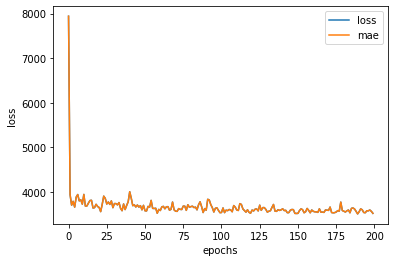

In [ ]:
new_insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

new_insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ["mae"])

history = new_insurance_model.fit(X_train_normal,Y_train,epochs = 200,verbose = 2)

# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
new_insurance_model.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3273.0132 - mae: 3273.0132


[3273.01318359375, 3273.01318359375]

In [ ]:
new_insurance_model.predict(X_test_normal)ee

array([[ 8.80116797e+03],
       [ 5.35490967e+03],
       [ 4.34823633e+04],
       [ 8.64986133e+03],
       [ 3.11370762e+04],
       [ 5.54922119e+03],
       [ 4.26913574e+02],
       [ 1.27734199e+04],
       [ 2.99191113e+03],
       [ 9.59660742e+03],
       [ 3.52047383e+04],
       [ 7.10436768e+03],
       [ 4.03914844e+03],
       [ 4.03430625e+04],
       [ 4.27445664e+04],
       [ 4.00181250e+04],
       [ 1.04710752e+04],
       [ 3.99618711e+04],
       [ 8.53683594e+03],
       [ 3.78358906e+04],
       [ 3.95176904e+03],
       [ 7.91071826e+03],
       [ 4.89760437e+02],
       [ 2.44976147e+03],
       [ 1.03236104e+04],
       [ 1.07149434e+04],
       [ 1.22226631e+04],
       [ 4.24784766e+03],
       [ 9.40672168e+03],
       [ 1.90805542e+02],
       [ 8.29550977e+03],
       [ 1.10872510e+04],
       [ 1.70770947e+03],
       [ 4.55733887e+03],
       [ 2.78448047e+03],
       [ 8.14875195e+03],
       [ 1.75405652e+03],
       [ 7.83591699e+03],
       [ 4.0